In [19]:
# aqui vamos treinar os dados de faturamento do RJ com svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('..')
from Scripts.utils import (train_model_with_grid_search, load_and_predict)

# show all columns 
pd.set_option('display.max_columns', None)
# show entire rows
pd.set_option('display.max_rows', None)
# show all values in a cell
pd.set_option('display.max_colwidth', None)

In [20]:
# carregando os dados
clean_data_rj = pd.read_excel('../Data/clean_data_rj.xlsx')

In [21]:
clean_data_rj.head()

,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,popDe25a49,domiciliosA,domiciliosB,popAte14,domicilios,propDomiciliosCriancas,propDomiciliosIdosos,rendaTotal,rendaMediaPop,propDomiciliosA,propDomiciliosB,propDomiciliosC,propDomiciliosD,propDomiciliosE
0,Abolição,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501,932515,Médio,3975,145,1957,1510,4349,0.347206,0.671189,10876849,931.556098,0.033341,0.449989,0.425615,0.021154,0.069901
1,Acari,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931,588833,Baixo,10118,0,588,7319,8451,0.866051,0.283635,7867881,285.440466,0.000000,0.069578,0.536031,0.097858,0.296533
2,Água Santa,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391,874200,Baixo,3831,96,1056,1282,2649,0.483956,0.535674,6333759,703.516495,0.036240,0.398641,0.440166,0.029068,0.095885
3,Alto Da Boa Vista,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727,912226,Médio,3324,292,910,1610,3154,0.510463,0.629677,11754958,1223.709973,0.092581,0.288523,0.484781,0.043437,0.090679
4,Anchieta,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380,553020,Médio,20932,0,3910,11451,18776,0.609874,0.436195,25910880,452.813254,0.000000,0.208245,0.560929,0.057147,0.173679


In [22]:
clean_data_rj.corr()['faturamento'].abs().sort_values(ascending=False)

/tmp/ipykernel_5685/2389500722.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clean_data_rj.corr()['faturamento'].abs().sort_values(ascending=False)


faturamento               1.000000
propDomiciliosC           0.787247
domiciliosA               0.784094
domiciliosA2              0.781901
domiciliosA1              0.757360
propDomiciliosA           0.723152
rendaTotal                0.686973
propDomiciliosCriancas    0.670689
propDomiciliosD           0.630973
domiciliosB1              0.611988
propDomiciliosB           0.592633
rendaMediaPop             0.573526
propDomiciliosIdosos      0.561436
rendaMedia                0.556335
propDomiciliosE           0.525988
domiciliosD               0.515005
domiciliosC2              0.481882
domiciliosE               0.414675
domiciliosB               0.342868
domiciliosC1              0.327108
popDe10a14                0.308244
popAte14                  0.304076
popAte9                   0.302087
popDe15a19                0.296336
popDe20a24                0.252967
popDe25a34                0.198317
popDe25a49                0.185360
popDe35a49                0.174759
população           

In [23]:
# colunas
clean_data_rj.columns

Index(['nome', 'população', 'popAte9', 'popDe10a14', 'popDe15a19',
       'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60',
       'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2',
       'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE',
       'rendaMedia', 'faturamento', 'potencial', 'popDe25a49', 'domiciliosA',
       'domiciliosB', 'popAte14', 'domicilios', 'propDomiciliosCriancas',
       'propDomiciliosIdosos', 'rendaTotal', 'rendaMediaPop',
       'propDomiciliosA', 'propDomiciliosB', 'propDomiciliosC',
       'propDomiciliosD', 'propDomiciliosE'],
      dtype='object')

In [24]:
# drop columns 
clean_data_rj.drop(columns=['nome','potencial'], inplace=True)

In [25]:
# separando os dados em treino e teste
X = clean_data_rj.drop('faturamento', axis=1)
y = clean_data_rj['faturamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

MAE: 64811.27520826519
MSE: 10696651233.92182
RMSE: 103424.61618938607
R2: 0.9474823438969183


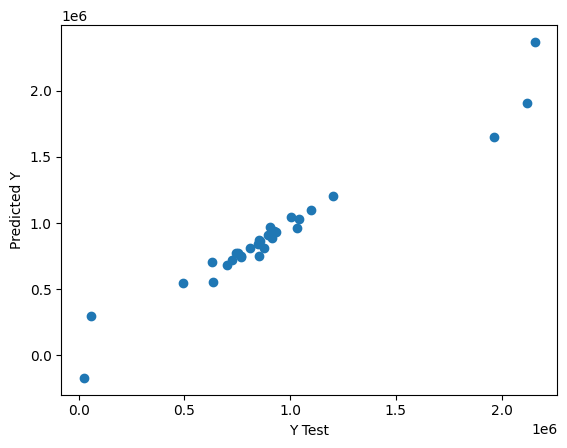

In [26]:
# regressão linear
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

# avaliando o modelo
predictions = lm.predict(X_test)

# plotando os resultados
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# avaliando o modelo
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

In [27]:
clean_data_sp = pd.read_excel('../Data/clean_data_sp.xlsx')
clean_data_sp.drop(columns=['nome','potencial'], inplace=True)

X_sp = clean_data_sp.drop('faturamento', axis=1)
lm.predict(scaler.transform(X_sp))

array([ 705648.48501928, 1528391.01915682,  586201.6584996 ,
       1211765.76365753,  990373.10202016, 1279231.4972595 ,
        938834.87738018, 1658460.81269026, 1295975.38957557,
       1235016.69774258, 1350785.96628784, 1543265.67740734,
        607414.75042269, 1073284.09233507,  934768.92787094,
        983730.8605289 , 1347812.14882811,  985262.63729946,
       1463850.16638984, 1134013.33011196, 1286201.11817702,
       1067533.79970145, 1415587.59402866,  887710.2593456 ,
       1460333.99746079,  708931.7017438 , 1507080.89027767,
        930435.12172923,  841921.48559597,  786164.00299706,
       1719426.51579266, 1315785.91646254, 1235478.13609926,
       1043459.99032598, 1344750.11325454, 1138866.17548945,
        899729.64112308,  952424.80886237,  969964.95104656,
       1051841.99604451,  797205.64034315,  877797.04116122,
       1366585.1717797 , 1268300.26183052, 1286810.08387758,
        959070.15357154,  959519.72468899,  906489.94069981,
        583414.74170942,

In [28]:
X = clean_data_rj.drop('faturamento', axis=1)
y = clean_data_rj['faturamento']

# Definir o modelo
model = SVR()

param_grid = {
    'model__C': [1, 10, 100, 1000, 10000, 12000], 
    'model__gamma': [1, 0.1, 0.01], 
    'model__kernel': ['poly'], 
    'model__epsilon': [0.3, 0.4, 0.5,0.6,0.7], 
    'model__degree': [1, 2], 
    'model__coef0': [0.0, 0.1, 0.2]
    }

# Chamar a função para treinar o modelo com a busca em grade e salvar
train_model_with_grid_search(X, y, model, param_grid, test_size=0.2, random_state=42, save_path='../Models/svr_model_rj.joblib')

Modelo treinado e salvo com sucesso!
Score no conjunto de teste: 0.9475419601733939


In [29]:
# linear regression
model = LinearRegression()

param_grid = {}

# Chamar a função para treinar o modelo com a busca em grade e salvar
train_model_with_grid_search(X, y, model, param_grid, test_size=0.2, random_state=42, save_path='../Models/linear_model_rj.joblib')

Modelo treinado e salvo com sucesso!
Score no conjunto de teste: 0.9474823438969183


In [30]:
load_and_predict(X_sp,'../Models/svr_model_rj.joblib')

array([ 442291.2119987 , 1309626.24176727,  177010.84975857,
       1153152.63433348,  781647.60385688, 1184520.54433297,
        755511.54968743, 1429475.00129647, 1242123.51677445,
       1176403.23862035, 1370727.94245096, 1285734.13921674,
        654945.88305783,  918332.73248975,  925227.37021214,
        714523.26357464, 1235286.13173494, 1025570.32363429,
       1312786.41160044, 1132270.29081643, 1142606.7249608 ,
        955661.07317719, 1324438.31066349,  900701.17859215,
       1257144.7743868 ,  713356.90982204, 1314676.38086497,
        902480.34147119,  677986.12038672,  800799.69567046,
       1464761.86181324, 1262932.21497738,  861480.22287352,
        964756.42749657, 1265364.82653037,  965087.89767203,
        772357.71046946,  865446.24383491,  969751.78225016,
       1029296.56295987,  675738.78438859,  906347.6092167 ,
       1310965.2679936 , 1116825.05016622,  937213.80842328,
        900459.09190799,  967775.14090576,  918592.86425284,
        115476.37718617,

In [31]:
load_and_predict(X_sp,'../Models/linear_model_rj.joblib')

array([ 705648.48501928, 1528391.01915682,  586201.6584996 ,
       1211765.76365753,  990373.10202016, 1279231.4972595 ,
        938834.87738018, 1658460.81269026, 1295975.38957557,
       1235016.69774258, 1350785.96628784, 1543265.67740734,
        607414.75042269, 1073284.09233507,  934768.92787094,
        983730.8605289 , 1347812.14882811,  985262.63729946,
       1463850.16638984, 1134013.33011196, 1286201.11817702,
       1067533.79970145, 1415587.59402866,  887710.2593456 ,
       1460333.99746079,  708931.7017438 , 1507080.89027767,
        930435.12172923,  841921.48559597,  786164.00299706,
       1719426.51579266, 1315785.91646254, 1235478.13609926,
       1043459.99032598, 1344750.11325454, 1138866.17548945,
        899729.64112308,  952424.80886237,  969964.95104656,
       1051841.99604451,  797205.64034315,  877797.04116122,
       1366585.1717797 , 1268300.26183052, 1286810.08387758,
        959070.15357154,  959519.72468899,  906489.94069981,
        583414.74170942,

In [35]:
# using the linear model, create a column with the predicted values
clean_data_sp = pd.read_excel('../Data/clean_data_sp.xlsx').drop(columns=['potencial','faturamento'])
data_to_model_sp = clean_data_sp.drop(columns=['nome'])

clean_data_sp['faturamento'] = load_and_predict(data_to_model_sp,'../Models/linear_model_rj.joblib')

In [36]:
clean_data_sp.head()

,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,popDe25a49,domiciliosA,domiciliosB,popAte14,domicilios,propDomiciliosCriancas,propDomiciliosIdosos,rendaTotal,rendaMediaPop,propDomiciliosA,propDomiciliosB,propDomiciliosC,propDomiciliosD,propDomiciliosE,faturamento
0,A. E. Carvalho,94034,12668,6853,9836,7487,14535,21549,10598,10508,0,253,2197,4368,6681,7011,2247,5670,1501,36084,253,6565,19521,28427,0.686706,0.369649,42668927,453.760629,0.008900,0.230942,0.481655,0.079045,0.199458,7.056485e+05
1,Aclimação,32791,2297,1017,2096,2197,5341,7281,4917,7645,1413,1734,3704,2351,1946,827,291,1617,5920,12622,3147,6055,3314,13883,0.238709,0.550673,82187360,2506.399927,0.226680,0.436145,0.199741,0.020961,0.116473,1.528391e+06
2,Adventista,104193,15070,7343,10631,8657,17749,23364,11567,9812,0,0,1423,4875,8595,10082,3111,5776,1284,41113,0,6298,22413,33862,0.661892,0.289764,43478808,417.291066,0.000000,0.185990,0.551562,0.091873,0.170575,5.862017e+05
3,Água Branca,12721,953,343,627,819,2142,2833,1790,3214,624,667,1558,1032,915,361,84,404,6278,4975,1291,2590,1296,5645,0.229584,0.569353,35439310,2785.890260,0.228698,0.458813,0.226041,0.014880,0.071568,1.211766e+06
4,Água Funda,48417,5078,2396,4018,3571,7388,10751,6648,8567,0,303,1794,2986,4489,2836,1104,2553,1905,18139,303,4780,7474,16065,0.465235,0.533271,30603825,632.088419,0.018861,0.297541,0.455960,0.068721,0.158917,9.903731e+05


In [37]:
# export the data   
clean_data_sp.to_excel('../Data/clean_data_w_faturamento.xlsx', index=False)